# Introduction

## Numpy

In [1]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

## SciPy

In [2]:
from scipy import sparse
eye = np.eye(4)
eye

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [3]:
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [4]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(eye_coo)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


## matplotlib

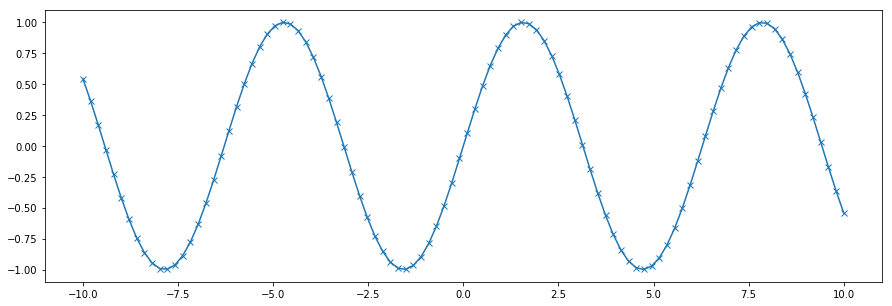

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.figure(figsize=(15, 5))
plt.plot(x, y, marker="x");

## pandas

In [6]:
import pandas as pd
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Location': ['New York', 'Paris', 'Berlin', 'London'],
    'Age': [24, 13, 53, 33]
}
df = pd.DataFrame(data)
df

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [7]:
df[df.Age > 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


## mglearn

See [book's github](https://github.com/amueller/introduction_to_ml_with_python). See [mglearn](https://github.com/amueller/introduction_to_ml_with_python/tree/master/mglearn) in particular.

You can install with followings

In [8]:
import sys
! {sys.executable} -m pip install mglearn > /dev/null

In [9]:
import mglearn
help(mglearn)

Help on package mglearn:

NAME
    mglearn

PACKAGE CONTENTS
    datasets
    make_blobs
    plot_2d_separator
    plot_agglomerative
    plot_animal_tree
    plot_cross_validation
    plot_dbscan
    plot_decomposition
    plot_grid_search
    plot_helpers
    plot_improper_preprocessing
    plot_interactive_tree
    plot_kmeans
    plot_kneighbors_regularization
    plot_knn_classification
    plot_knn_regression
    plot_linear_regression
    plot_linear_svc_regularization
    plot_metrics
    plot_nmf
    plot_nn_graphs
    plot_pca
    plot_rbf_svm_parameters
    plot_ridge
    plot_scaling
    plot_tree_nonmonotonous
    plots
    tools

FUNCTIONS
    discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None, labels=None, padding=0.2, alpha=1, c=None, markeredgewidth=None)
        Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
        
        Parameters
        ----------
        
        x1 : nd-array
            input data, first axis
        
        x2

## basic imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

## Python 3

In [11]:
import sys
sys.version

'3.7.2 (default, Dec 29 2018, 00:00:04) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [12]:
pd.__version__

'0.24.2'

In [13]:
import matplotlib
matplotlib.__version__

'3.0.3'

## A first application: classifying Iris species

### Meet the data

In [14]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
type(iris_dataset)

sklearn.utils.Bunch

In [16]:
! head -6 /anaconda3/envs/intro-ml/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv

150,4,setosa,versicolor,virginica
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0


In [17]:
print(iris_dataset.DESCR[:200])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive


In [18]:
for key in iris_dataset.keys():
    if key not in ['data', 'filename', 'DESCR']:
        print(f'{key}: {iris_dataset[key]}')
        print()

target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

target_names: ['setosa' 'versicolor' 'virginica']

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



In [19]:
data = iris_dataset.data
type(data)

numpy.ndarray

In [20]:
data.shape

(150, 4)

In [21]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
target = iris_dataset.target

In [23]:
target.shape

(150,)

### Training, testing

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, random_state=0
)

In [25]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(112, 4)

(38, 4)

(112,)

(38,)

### Look at your data

In [26]:
X_train[:5]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3]])

In [27]:
y_train[:5]

array([1, 1, 2, 0, 2])

In [28]:
df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


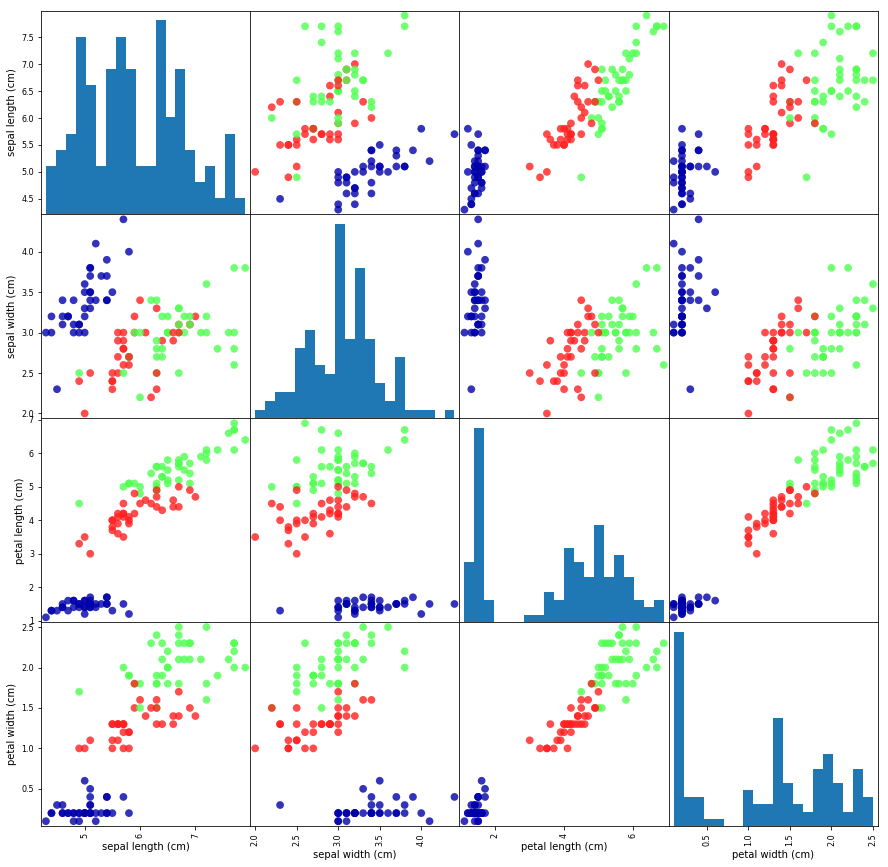

In [29]:
pd.plotting.scatter_matrix(df, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3);

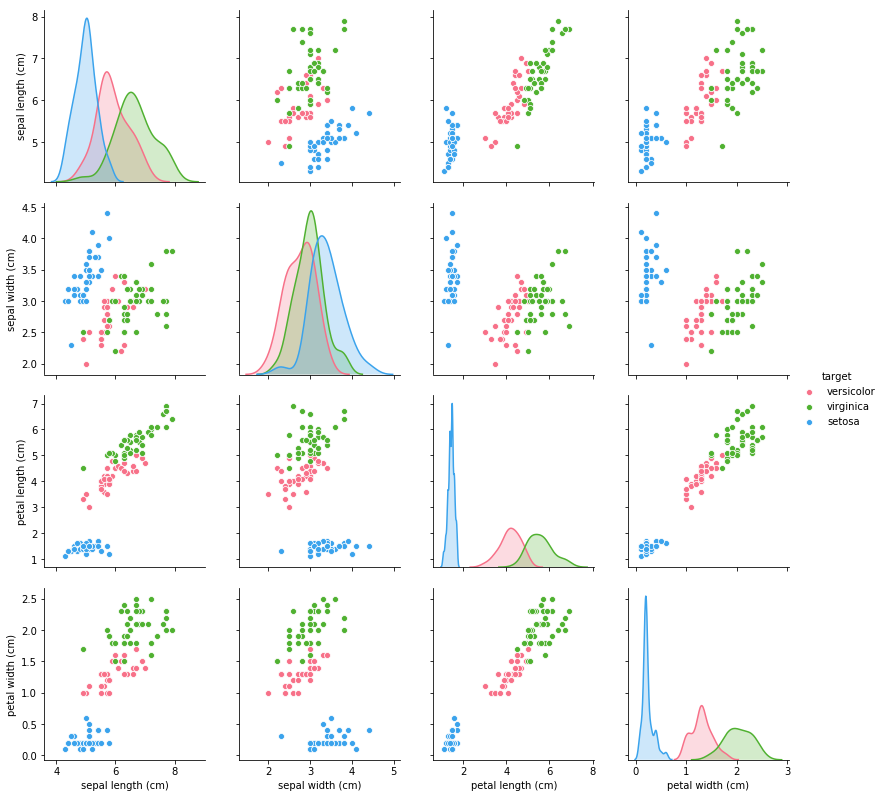

In [30]:
import seaborn as sns
df['target'] = np.vectorize(lambda x: iris_dataset.target_names[int(x)])(y_train)
sns.pairplot(df, vars=iris_dataset.feature_names, hue='target', palette="husl", height=2.8);

### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset.target_names[prediction])

[0]
['setosa']


In [34]:
y_pred = knn.predict(X_test)

In [35]:
np.mean(y_pred == y_test)

0.9736842105263158

In [36]:
knn.score(X_test, y_test)

0.9736842105263158